In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm

from Gang import Gang, form_squad
from Gangster import Gangster

In [2]:
def grow(gangs):
  for gang in gangs:
    gang.grow()
    gang.update()
    gang.collect_income()

def move(gangs):
  gangs[0].move(gangs[1])
  gangs[0].update()
  gangs[1].update()

  gangs[1].move(gangs[0])
  gangs[0].update()
  gangs[1].update()


def game(g0,g1):
  gangs = [g0, g1]
  for _ in range(100):
    grow(gangs)
    move(gangs)
    # random.shuffle(gangs)
  if g0.num_member == 1:
    return 1
  elif g1.num_member == 1:
    return 0
  return 2 


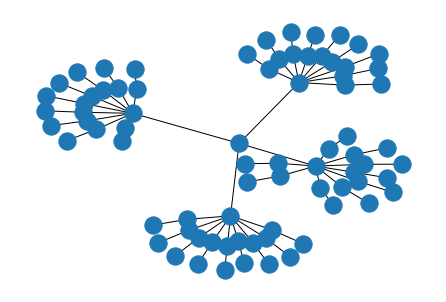

In [3]:
g1 = Gang(territory = 500, a = 0.6, base_R = 3, R_rate = 2)
g1.grow()

# g1.members
g1.draw()

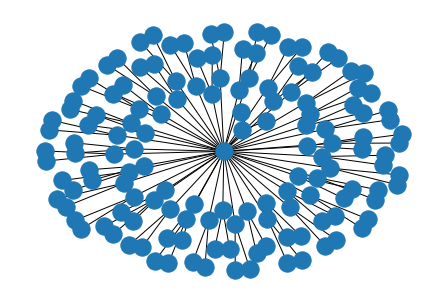

In [4]:
g2 = Gang(territory = 500, a = 0.8, base_R = 10, R_rate = 2)
g2.grow()

# g1.members
g2.draw()

## Single War

In [10]:
g0 = Gang(territory = 500, a = 0.2, base_R = 2, R_rate = 2)
g1 = Gang(territory = 500, a = 0.6, base_R = 3, R_rate = 2)

gangs = [g0, g1] 

out = []
for i in range(100):
  grow(gangs)
  if i > 0:
    move(gangs)
  print (f'Round {i}')
  print (f'Gang1: Territory {gangs[0].tot_territory:.2f}; People {gangs[0].num_member}; Wealth {gangs[0].tot_wealth:.2f}')
  print (f'Gang2: Territory {gangs[1].tot_territory:.2f}; People {gangs[1].num_member}; Wealth {gangs[1].tot_wealth:.2f}')
  print (f'==============================')
  out.append(gangs[0].tot_territory/(gangs[0].tot_territory+gangs[1].tot_territory))
  if gangs[0].num_member ==1 or gangs[1].num_member ==1:
    break


Round 0
Gang1: Territory 500.00; People 85; Wealth 36.07
Gang2: Territory 500.00; People 77; Wealth 73.45
Round 1
Gang1: Territory 491.67; People 95; Wealth 74.79
Gang2: Territory 508.33; People 81; Wealth 150.86
Round 2
Gang1: Territory 496.67; People 98; Wealth 115.29
Gang2: Territory 503.33; People 84; Wealth 230.51
Round 3
Gang1: Territory 501.67; People 97; Wealth 155.29
Gang2: Territory 498.33; People 83; Wealth 308.65
Round 4
Gang1: Territory 498.33; People 98; Wealth 193.71
Gang2: Territory 501.67; People 82; Wealth 385.30
Round 5
Gang1: Territory 592.92; People 74; Wealth 196.49
Gang2: Territory 407.08; People 62; Wealth 384.27
Round 6
Gang1: Territory 589.39; People 117; Wealth 244.28
Gang2: Territory 410.61; People 63; Wealth 443.20
Round 7
Gang1: Territory 585.86; People 119; Wealth 291.81
Gang2: Territory 414.14; People 58; Wealth 479.73
Round 8
Gang1: Territory 582.33; People 118; Wealth 338.46
Gang2: Territory 417.67; People 63; Wealth 537.65
Round 9
Gang1: Territory 587

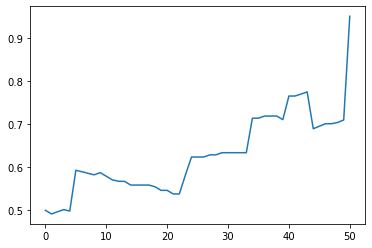

In [11]:
plt.plot(out)

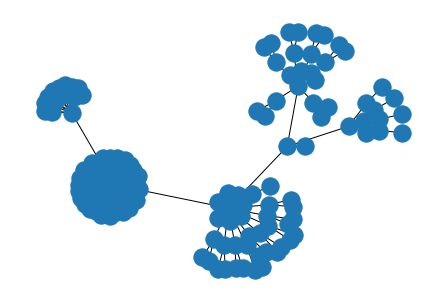

In [12]:
gangs[0].draw()

## Multi-Combat

In [24]:
counter = [0,0,0] #g0, g1, draw 
for _ in tqdm(range(100)):
  g0 = Gang(territory = 500, a = 0.8, base_R = 2, R_rate = 3)
  g1 = Gang(territory = 500, a = 0.8, base_R = 2, R_rate = 2)

  res = game(g0,g1)
  counter[res] += 1

100%|██████████| 100/100 [00:25<00:00,  3.90it/s]


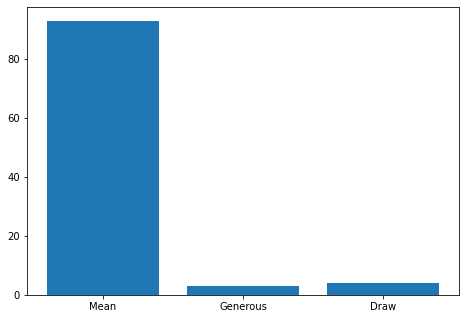

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
winners = ['Mean', 'Generous', 'Draw']
ax.bar(winners,counter)
plt.show()